In [3]:
import pandas as pd
import requests
import numpy as np

In [2]:
path = '/Users/haikundu/Desktop/shanshu/hackathon/data/personal profile.xlsx'
person_profile = pd.read_excel(path)

In [3]:
def get_address(address):
    url="http://restapi.amap.com/v3/geocode/geo?key=18d814cd5739a368b7afddd9c3c188dc&address=%s"%(address)
    data=requests.get(url)
    contest=data.json()
    contest=contest['geocodes'][0]['location']
    return contest

In [4]:
def add_str(x,y):
    return str(y)+ '市' +str(x)
person_profile['address'] = person_profile.apply(lambda x: add_str(x['PrimaryCounty'],x['PrimaryCity']), axis = 1)

In [5]:
person_profile['log_lat'] = person_profile.apply(lambda x: get_address(x['address']),axis = 1)

In [ ]:
'''
for i in range(person_profile.shape[0]):
    person_profile.loc[i,'log_lat'] = get_address(person_profile.loc[i,'address'])
    print(i)
'''

In [6]:
person_profile.loc[:,'longitude'] = person_profile.apply(lambda x: x['log_lat'].split(',')[0],axis = 1)
person_profile.loc[:,'latitude'] = person_profile.apply(lambda x: x['log_lat'].split(',')[1],axis = 1)

In [39]:
person_profile.shape

(43040, 11)

In [7]:
person_profile.to_csv('含地理信息.csv')

In [4]:
path_prod = '/Users/haikundu/Desktop/shanshu/hackathon/data/personal prod.csv'
personal_prod = pd.read_csv(path_prod)

In [116]:
person_profile = pd.read_csv('/Users/haikundu/Desktop/shanshu/hackathon/含地理信息.csv')

In [117]:
personal_prod.columns

Index(['ProductionMonthKey', 'BK_ContactID', 'ProductionAmount',
       'monthssincebecomingbc', 'OrderingConsultantIndicator',
       'ProductionOrderCount', 'CareerLevelCode', 'ActivityStatusCode'],
      dtype='object')

In [118]:
tidydata = pd.merge(person_profile,
                    personal_prod[personal_prod['ProductionMonthKey'] == 201803][['BK_ContactID',
                                                                                  'ActivityStatusCode',
                                                                                  'ProductionAmount',
                                                                                  'monthssincebecomingbc',
                                                                                  'OrderingConsultantIndicator',
                                                                                  'ProductionOrderCount',
                                                                                  'CareerLevelCode']],
                    left_on = 'BK_ContactID',right_on = 'BK_ContactID', how = 'inner')
for i in [201704,201705,201706,201707,201708,201709,201710,201711,201712,201801,201802]:
    tidydata = pd.merge(tidydata,
                        personal_prod[personal_prod['ProductionMonthKey'] == i][['BK_ContactID',
                                                                                 'ActivityStatusCode',
                                                                                 'ProductionAmount',
                                                                                 'monthssincebecomingbc',
                                                                                 'OrderingConsultantIndicator',
                                                                                 'ProductionOrderCount',
                                                                                 'CareerLevelCode']],
                       left_on = 'BK_ContactID',right_on = 'BK_ContactID', how = 'left')

In [26]:
personal_prod_12 = personal_prod[personal_prod['ProductionMonthKey'] == 201803]

In [12]:
merged = pd.merge(person_profile,personal_prod_12 , left_on = 'BK_ContactID',right_on = 'BK_ContactID', how = 'inner')

In [74]:
path_team = '/Users/haikundu/Desktop/shanshu/hackathon/data/team prod.csv'
team_prod = pd.read_csv(path_team)

In [15]:
team_prod_12 = team_prod[team_prod['ProductionMonthKey'] == 201803]

In [16]:
merged_1 = pd.merge(merged,team_prod_12 , left_on = 'BK_ContactID',right_on = 'contactid', how = 'inner')

In [76]:
path_unit = '/Users/haikundu/Desktop/shanshu/hackathon/data/unit prod.csv'
unit_prod = pd.read_csv(path_unit)

In [77]:
unit_prod.columns

Index(['ProductionMonthKey', 'contactid', 'ProductionAmount',
       'NewRecruitCount', 'OrderingConsultantCount', 'NBCCount', 'N1BCCount',
       'N2BCCount', 'N3BCCount', 'ABCCount', 'A1BCCount', 'A2BCCount',
       'A3BCCount', 'PBCCount', 'P1BCCount', 'P2BCCount', 'P3BCCount',
       'TBCCount', 'T1BCCount', 'T2BCCount', 'T3BCCount', 'T4BCCount',
       'T5BCCount', 'T6BCCount', 'DIQCount', 'FDirCount', 'RJCount',
       'StarCount', 'SBCCount', 'BC15Count', 'BC10Count'],
      dtype='object')

In [119]:
for i in [201704,201705,201706,201707,201708,201709,201710,201711,201712,201801,201802]:
    tidydata = pd.merge(tidydata,
                        unit_prod[unit_prod['ProductionMonthKey'] == i][['contactid',
                                                                          'ProductionAmount',
                                                                          'NewRecruitCount',
                                                                          'OrderingConsultantCount',
                                                                          'NBCCount',
                                                                          'ABCCount',
                                                                          'PBCCount',
                                                                          'TBCCount',
                                                                          'DIQCount',
                                                                          'FDirCount',
                                                                          'RJCount',
                                                                          'StarCount',
                                                                          'SBCCount',
                                                                          'BC10Count',
                                                                          'BC15Count']],
                       left_on = 'BK_ContactID',right_on = 'contactid', how = 'left')
tidydata = pd.merge(tidydata,
                        unit_prod[unit_prod['ProductionMonthKey'] == 201803][['contactid',
                                                                          'ProductionAmount',
                                                                          'NewRecruitCount',
                                                                          'OrderingConsultantCount',
                                                                          'NBCCount',
                                                                          'ABCCount',
                                                                          'PBCCount',
                                                                          'TBCCount',
                                                                          'DIQCount',
                                                                          'FDirCount',
                                                                          'RJCount',
                                                                          'StarCount',
                                                                          'SBCCount',
                                                                          'BC10Count',
                                                                          'BC15Count']],
                       left_on = 'BK_ContactID',right_on = 'contactid', how = 'inner')

In [123]:
tidydata.shape

(26403, 264)

In [120]:
columns = ['index','BK_ContactID','StartDate','PrimaryProvince',
                    'PrimaryCity','PrimaryCounty','PrimaryStreet','Birthday-year',
                    'address','log_lat','longitude','latitude',
                    'ActivityStatusCode_pprod1','ProductionAmount_pprod1','monthssincebecomingbc_pprod1','OrderingConsultantIndicator_pprod1','ProductionOrderCount_pprod1','CareerLevelCode_pprod1',
                    'ActivityStatusCode_pprod12','ProductionAmount_pprod12','monthssincebecomingbc_pprod12','OrderingConsultantIndicator_pprod12','ProductionOrderCount_pprod12','CareerLevelCode_pprod12',
                    'ActivityStatusCode_pprod11','ProductionAmount_pprod11','monthssincebecomingbc_pprod11','OrderingConsultantIndicator_pprod11','ProductionOrderCount_pprod11','CareerLevelCode_pprod11',
                    'ActivityStatusCode_pprod10','ProductionAmount_pprod10','monthssincebecomingbc_pprod10','OrderingConsultantIndicator_pprod10','ProductionOrderCount_pprod10','CareerLevelCode_pprod10',
                    'ActivityStatusCode_pprod9','ProductionAmount_pprod9','monthssincebecomingbc_pprod9','OrderingConsultantIndicator_pprod9','ProductionOrderCount_pprod9','CareerLevelCode_pprod9',
                    'ActivityStatusCode_pprod8','ProductionAmount_pprod8','monthssincebecomingbc_pprod8','OrderingConsultantIndicator_pprod8','ProductionOrderCount_pprod8','CareerLevelCode_pprod8',
                    'ActivityStatusCode_pprod7','ProductionAmount_pprod7','monthssincebecomingbc_pprod7','OrderingConsultantIndicator_pprod7','ProductionOrderCount_pprod7','CareerLevelCode_pprod7',
                    'ActivityStatusCode_pprod6','ProductionAmount_pprod6','monthssincebecomingbc_pprod6','OrderingConsultantIndicator_pprod6','ProductionOrderCount_pprod6','CareerLevelCode_pprod6',
                    'ActivityStatusCode_pprod5','ProductionAmount_pprod5','monthssincebecomingbc_pprod5','OrderingConsultantIndicator_pprod5','ProductionOrderCount_pprod5','CareerLevelCode_pprod5',
                    'ActivityStatusCode_pprod4','ProductionAmount_pprod4','monthssincebecomingbc_pprod4','OrderingConsultantIndicator_pprod4','ProductionOrderCount_pprod4','CareerLevelCode_pprod4',
                    'ActivityStatusCode_pprod3','ProductionAmount_pprod3','monthssincebecomingbc_pprod3','OrderingConsultantIndicator_pprod3','ProductionOrderCount_pprod3','CareerLevelCode_pprod3',
                    'ActivityStatusCode_pprod2','ProductionAmount_pprod2','monthssincebecomingbc_pprod2','OrderingConsultantIndicator_pprod2','ProductionOrderCount_pprod2','CareerLevelCode_pprod2']
for i in range(12):
    for name in ['contactid','ProductionAmount','NewRecruitCount','OrderingConsultantCount',
                    'NBCCount','ABCCount','PBCCount','TBCCount',
                    'DIQCount','FDirCount','RJCount','StarCount','SBCCount','BC10Count','BC15Count']:
        columns.append(name+str(12-i))
tidydata.columns = columns

In [121]:
tidydata['longitude'] = tidydata['longitude'].astype(np.float64)
tidydata['latitude'] = tidydata['latitude'].astype(np.float64)

In [122]:
tidydata.to_csv('tidydata.csv')

In [42]:
unit_prod_12 = unit_prod[unit_prod['ProductionMonthKey'] == 201711]
unit_prod_12.columns


Index(['ProductionMonthKey', 'contactid', 'ProductionAmount',
       'NewRecruitCount', 'OrderingConsultantCount', 'NBCCount', 'N1BCCount',
       'N2BCCount', 'N3BCCount', 'ABCCount', 'A1BCCount', 'A2BCCount',
       'A3BCCount', 'PBCCount', 'P1BCCount', 'P2BCCount', 'P3BCCount',
       'TBCCount', 'T1BCCount', 'T2BCCount', 'T3BCCount', 'T4BCCount',
       'T5BCCount', 'T6BCCount', 'DIQCount', 'FDirCount', 'RJCount',
       'StarCount', 'SBCCount', 'BC15Count', 'BC10Count'],
      dtype='object')

In [47]:
unit_prod.groupby('contactid').sum().shape

(43040, 30)

In [ ]:
merged_2 = pd.merge(merged_1,unit_prod_12 , left_on = 'BK_ContactID',right_on = 'contactid', how = 'inner')

In [ ]:
merged_2.shape

In [ ]:
#tidy_data = merged_2.drop(['PrimaryProvince','PrimaryCity','PrimaryCounty','PrimaryStreet','address','log_lat'],axis= 1)
tidy_data = merged_2

In [ ]:
tidy_data['longitude'] = tidy_data['longitude'].astype(np.float64)
tidy_data['latitude'] = tidy_data['latitude'].astype(np.float64)

In [ ]:
tidy_data.to_csv('alldata.csv')

In [81]:
tidy_data.columns

Index(['BK_ContactID', 'StartDate', 'Birthday-year', 'longitude', 'latitude',
       'ProductionMonthKey_x', 'ProductionAmount_x', 'monthssincebecomingbc',
       'OrderingConsultantIndicator', 'ProductionOrderCount',
       'CareerLevelCode', 'ActivityStatusCode', 'ProductionMonthKey_y',
       'contactid_x', 'NewRecruitCount_x', 'ProductionAmount_y',
       'ActiveConsultantCount', 'OrderingConsultantCount_x',
       'ProductionMonthKey', 'contactid_y', 'ProductionAmount',
       'NewRecruitCount_y', 'OrderingConsultantCount_y', 'NBCCount',
       'N1BCCount', 'N2BCCount', 'N3BCCount', 'ABCCount', 'A1BCCount',
       'A2BCCount', 'A3BCCount', 'PBCCount', 'P1BCCount', 'P2BCCount',
       'P3BCCount', 'TBCCount', 'T1BCCount', 'T2BCCount', 'T3BCCount',
       'T4BCCount', 'T5BCCount', 'T6BCCount', 'DIQCount', 'FDirCount',
       'RJCount', 'StarCount', 'SBCCount', 'BC15Count', 'BC10Count'],
      dtype='object')

In [133]:
tidy_data.loc[:,'offspring'] = tidy_data.loc[:,'NBCCount'] + tidy_data.loc[:,'ABCCount'] + tidy_data.loc[:,'PBCCount'] + tidy_data.loc[:,'TBCCount']

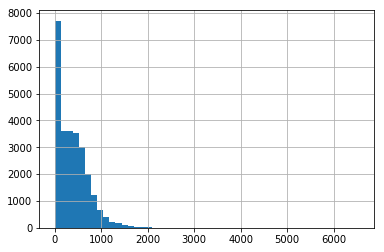

In [139]:
tidy_data.apply(lambda x: x['ProductionAmount']/x['offspring'],axis = 1).hist(bins = 50)

In [257]:
list(tidydata.columns)

['index',
 'BK_ContactID',
 'StartDate',
 'PrimaryProvince',
 'PrimaryCity',
 'PrimaryCounty',
 'PrimaryStreet',
 'Birthday-year',
 'address',
 'log_lat',
 'longitude',
 'latitude',
 'ActivityStatusCode_pprod1',
 'ProductionAmount_pprod1',
 'monthssincebecomingbc_pprod1',
 'OrderingConsultantIndicator_pprod1',
 'ProductionOrderCount_pprod1',
 'CareerLevelCode_pprod1',
 'ActivityStatusCode_pprod12',
 'ProductionAmount_pprod12',
 'monthssincebecomingbc_pprod12',
 'OrderingConsultantIndicator_pprod12',
 'ProductionOrderCount_pprod12',
 'CareerLevelCode_pprod12',
 'ActivityStatusCode_pprod11',
 'ProductionAmount_pprod11',
 'monthssincebecomingbc_pprod11',
 'OrderingConsultantIndicator_pprod11',
 'ProductionOrderCount_pprod11',
 'CareerLevelCode_pprod11',
 'ActivityStatusCode_pprod10',
 'ProductionAmount_pprod10',
 'monthssincebecomingbc_pprod10',
 'OrderingConsultantIndicator_pprod10',
 'ProductionOrderCount_pprod10',
 'CareerLevelCode_pprod10',
 'ActivityStatusCode_pprod9',
 'ProductionAm

In [126]:
relationship = pd.read_csv('/Users/haikundu/Desktop/shanshu/hackathon/data/unit relationships.csv')

/Users/haikundu/anaconda/envs/python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [127]:
relationship_12 = relationship[relationship['ProductionMonthKEY'] == 201803]

In [239]:
unit_info = relationship_12.groupby('parentcontactid').count().reset_index()[['parentcontactid','Affiliated']]
unit_info.columns = ['contactid','offspring']

In [240]:
distance_chief = relationship_12[relationship_12.parentcontactid.isin(chief)][['offspringcontactid','OffspringLineNumber']]

In [245]:
combined = pd.merge(unit_info,distance_chief, left_on = 'contactid', right_on = 'offspringcontactid', how = 'left')[['contactid','offspring','OffspringLineNumber']]

In [246]:
child = relationship_12.loc[:,'offspringcontactid'].tolist()
parent = relationship_12.loc[:,'parentcontactid'].tolist()
edge = list(zip(parent,child))
import networkx as nx
DG = nx.DiGraph()
DG.add_edges_from(edge)

In [259]:
from networkx.algorithms.traversal.breadth_first_search import bfs_edges
#combined['in_degree'] = combined['contactid'].apply(lambda x: DG.in_degree(x))
#combined['out_degree'] = combined['contactid'].apply(lambda x: DG.out_degree(x))

temp_person = 20002864080
bfs = bfs_edges(DG,temp_person)
unit_member = [x[1] for x in list(bfs)]
temp_info_continuous = tidydata[tidydata.BK_ContactID.isin(unit_member)][['latitude','longitude','age','age_MLK']]
temp_info_discrete = tidydata[tidydata.BK_ContactID.isin(unit_member)][['age0','age1','age2','age3',
                                                                        'age_MLK',
 'age_MLK0',
 'age_MLK1',
 'age_MLK2',
 'age_MLK3',
 '七台河',
 '万宁市',
 '三亚',
 '三明',
 '三门峡',
 '上海',
 '上饶',
 '东方市',
 '东莞',
 '东营',
 '中卫',
 '中山',
 '临夏回族自治州',
 '临汾',
 '临沂',
 '临沧',
 '丹东',
 '丽水',
 '丽江',
 '乌兰察布',
 '乌海',
 '乌鲁木齐',
 '乐山',
 '九江',
 '云浮',
 '五家渠',
 '亳州',
 '仙桃市',
 '伊犁哈萨克自治州',
 '佛山',
 '佳木斯',
 '保亭黎族苗族自治县',
 '保定',
 '保山',
 '信阳',
 '儋州',
 '克孜勒苏柯尔克孜自治州',
 '克拉玛依',
 '六安',
 '六盘水',
 '兰州',
 '兴安盟',
 '内江',
 '凉山彝族自治州',
 '包头',
 '北京',
 '北海',
 '十堰',
 '南京',
 '南充',
 '南宁',
 '南平',
 '南昌',
 '南通',
 '南阳',
 '博尔塔拉蒙古自治州',
 '厦门',
 '双鸭山',
 '台州',
 '合肥',
 '吉安',
 '吉林',
 '吐鲁番地区',
 '吕梁',
 '吴忠',
 '周口',
 '呼伦贝尔',
 '呼和浩特',
 '和田地区',
 '咸宁',
 '咸阳',
 '哈密地区',
 '哈尔滨',
 '唐山',
 '商丘',
 '商洛',
 '喀什地区',
 '嘉兴',
 '嘉峪关',
 '四平',
 '固原',
 '塔城地区',
 '大兴安岭地区',
 '大同',
 '大庆',
 '大理白族自治州',
 '大连',
 '天水',
 '天津',
 '天门',
 '太原',
 '威海',
 '娄底',
 '孝感',
 '宁德',
 '宁波',
 '安庆',
 '安康',
 '安阳',
 '安顺',
 '定西',
 '宜宾',
 '宜昌',
 '宜春',
 '宝鸡',
 '宣城',
 '宿州',
 '宿迁',
 '屯昌县',
 '岳阳',
 '崇左',
 '巢湖',
 '巴中',
 '巴彦淖尔',
 '巴音郭楞蒙古自治州',
 '常州',
 '常德',
 '平凉',
 '平顶山',
 '广元',
 '广安',
 '广州',
 '庆阳',
 '廊坊',
 '延安',
 '延边朝鲜族自治州',
 '开封',
 '张家口',
 '张家界',
 '张掖',
 '徐州',
 '德宏傣族景颇族自治州',
 '德州',
 '德阳',
 '忻州',
 '怀化',
 '怒江傈僳族自治州',
 '恩施',
 '惠州',
 '成都',
 '扬州',
 '承德',
 '抚州',
 '抚顺',
 '揭阳',
 '攀枝花',
 '文山壮族苗族自治州',
 '文昌市',
 '新乡',
 '新余',
 '无锡',
 '日照',
 '昆明',
 '昌吉回族自治州',
 '昌江黎族自治县',
 '昭通',
 '晋中',
 '晋城',
 '普洱',
 '景德镇',
 '曲靖',
 '朔州',
 '朝阳',
 '本溪',
 '来宾',
 '杭州',
 '松原',
 '枣庄',
 '柳州',
 '株洲',
 '桂林',
 '梅州',
 '梧州',
 '楚雄彝族自治州',
 '榆林',
 '武威',
 '武汉',
 '毕节',
 '永州',
 '汉中',
 '汕头',
 '汕尾',
 '江门',
 '池州',
 '沈阳',
 '沧州',
 '河池',
 '河源',
 '泉州',
 '泰安',
 '泰州',
 '泸州',
 '洛阳',
 '济南',
 '济宁',
 '海东地区',
 '海北藏族自治州',
 '海南藏族自治州',
 '海口',
 '海西蒙古族藏族自治州',
 '淄博',
 '淮北',
 '淮南',
 '淮安',
 '深圳',
 '清远',
 '温州',
 '渭南',
 '湖州',
 '湘潭',
 '湘西土家族苗族自治州',
 '湛江',
 '滁州',
 '滨州',
 '漯河',
 '漳州',
 '潍坊',
 '潜江',
 '潮州',
 '澄迈县',
 '濮阳',
 '烟台',
 '焦作',
 '牡丹江',
 '玉林',
 '玉树藏族自治州',
 '玉溪',
 '珠海',
 '琼中黎族苗族自治县',
 '琼海市',
 '甘南藏族自治州',
 '甘孜藏族自治州',
 '白城',
 '白山',
 '白银',
 '百色',
 '益阳',
 '盐城',
 '盘锦',
 '眉山',
 '石嘴山',
 '石家庄',
 '石河子',
 '福州',
 '秦皇岛',
 '红河哈尼族彝族自治州',
 '绍兴',
 '绥化',
 '绵阳',
 '聊城',
 '肇庆',
 '自贡',
 '舟山',
 '芜湖',
 '苏州',
 '茂名',
 '荆州',
 '荆门',
 '莆田',
 '莱芜',
 '菏泽',
 '萍乡',
 '营口',
 '葫芦岛',
 '蚌埠',
 '衡水',
 '衡阳',
 '衢州',
 '襄阳',
 '西双版纳傣族自治州',
 '西宁',
 '西安',
 '许昌',
 '贵港',
 '贵阳',
 '贺州',
 '资阳',
 '赣州',
 '赤峰',
 '辽源',
 '辽阳',
 '达州',
 '运城',
 '连云港',
 '迪庆藏族自治州',
 '通化',
 '通辽',
 '遂宁',
 '遵义',
 '邢台',
 '邯郸',
 '邵阳',
 '郑州',
 '郴州',
 '鄂尔多斯',
 '鄂州',
 '酒泉',
 '重庆',
 '金华',
 '金昌',
 '钦州',
 '铁岭',
 '铜仁',
 '铜川',
 '铜陵',
 '银川',
 '锡林郭勒盟',
 '锦州',
 '镇江',
 '长春',
 '长沙',
 '长治',
 '阜新',
 '阜阳',
 '防城港',
 '阳江',
 '阳泉',
 '阿克苏地区',
 '阿勒泰地区',
 '阿坝藏族羌族自治州',
 '阿拉善盟',
 '阿拉尔市',
 '陇南',
 '陵水黎族自治县',
 '随州',
 '雅安',
 '青岛',
 '鞍山',
 '韶关',
 '马鞍山',
 '驻马店',
 '鸡西',
 '鹤壁',
 '鹤岗',
 '鹰潭',
 '黄冈',
 '黄南藏族自治州',
 '黄山',
 '黄石',
 '黑河',
 '黔东南苗族侗族自治州',
 '黔南州',
 '黔南布依族苗族自治州',
 '黔西南布依族苗族自治州',
 '齐齐哈尔',
 '龙岩',]]


KeyError: "['age' 'age_MLK'] not in index"

In [219]:
shouxi = []
for i in parent:
    if DG.in_degree(i) == 0:
        shouxi.append(i)
chief = list(set(shouxi))

In [247]:
DG.in_degree(combined.loc[1,'contactid'])

1